In [196]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [197]:
def circuit(qc, i, n):
    if i == -1:
        return qc
    qc.h(i)
    start = 2
    for j in range(i-1, -1, -1):
        qc.cp(2*pi/(2**(start)), i, j)
        start+=1
    i-=1
    return circuit(qc, i, n)

In [198]:
n = 4
initial = '0011'

qc = QuantumCircuit(n)
for i in range(n):
    if initial[n-1-i] == '1' :
        qc.x(i)


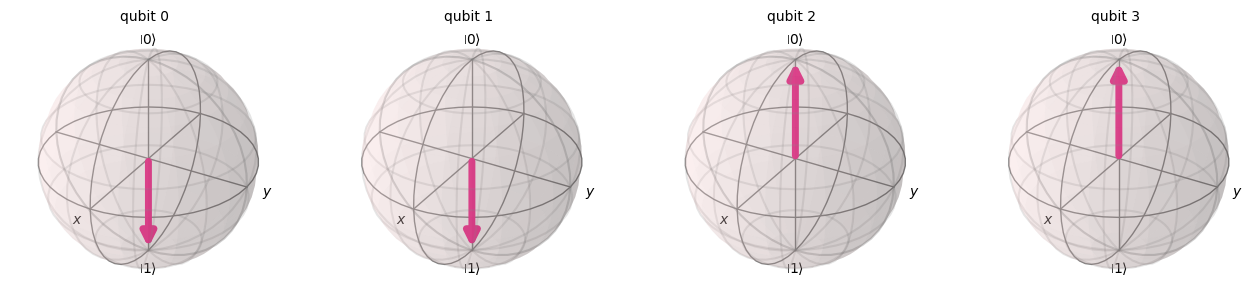

In [199]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

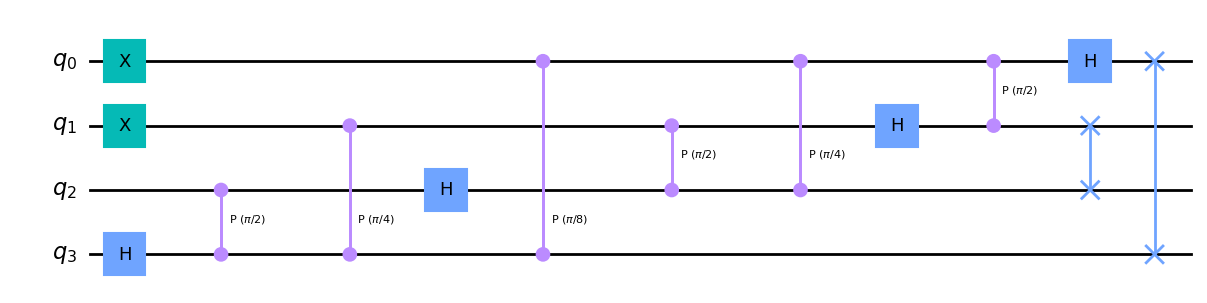

In [200]:
i = n-1
circuit(qc, i, n)
for i in range(n//2):
    qc.swap(i, n-1-i)
qc.draw('mpl')

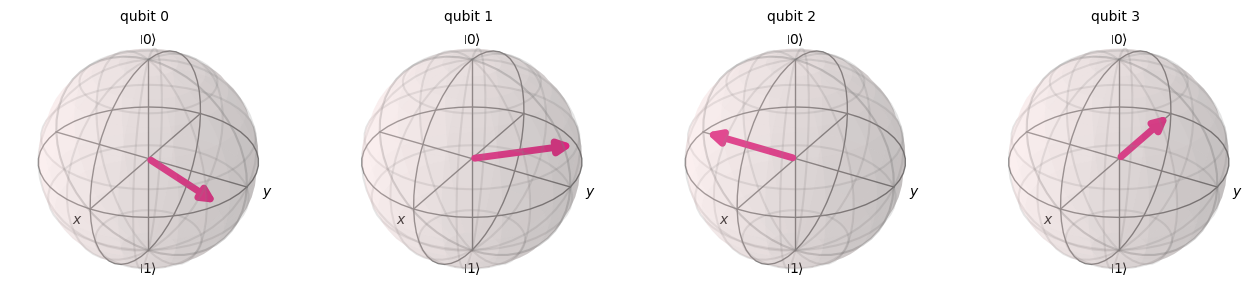

In [201]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)